# Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])

def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure(figsize = (11,11))
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

In [2]:
def answer_one():
    return nx.read_edgelist('Employee_Movie_Choices.txt', delimiter = '\t')
answer_one()  

<IPython.core.display.Javascript object>


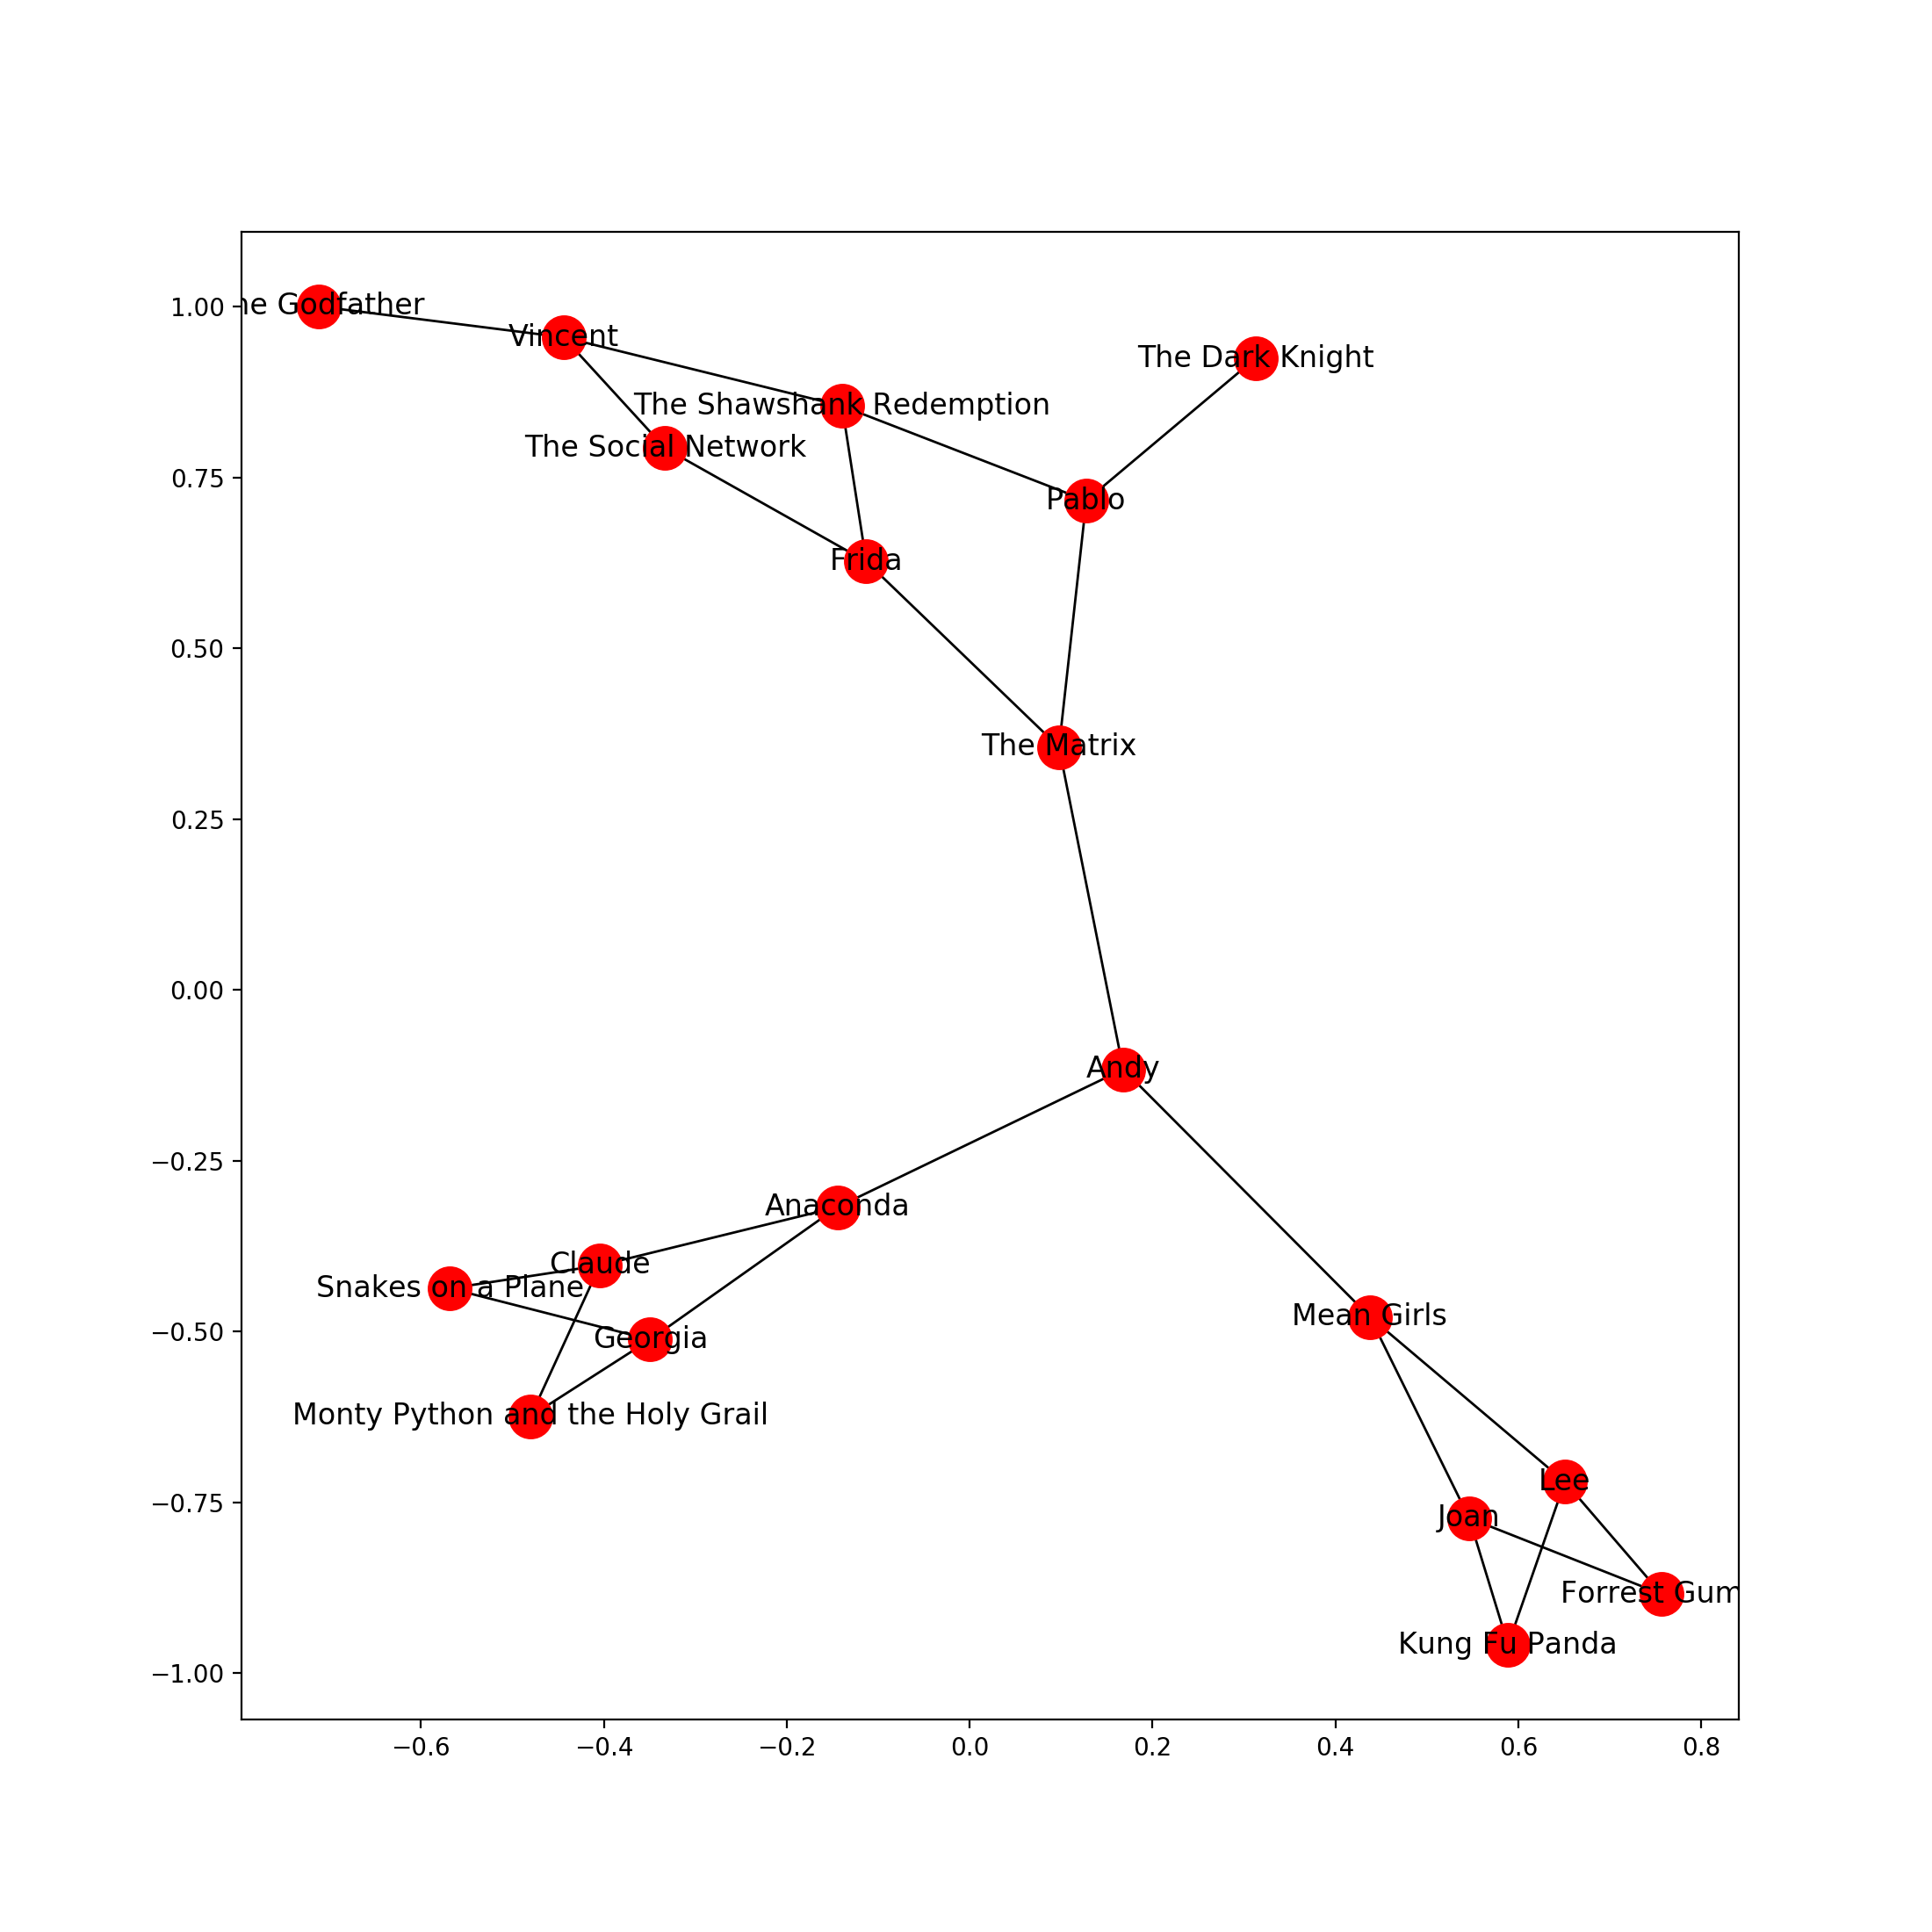

In [9]:
plot_graph(answer_one())

### Question 2

Add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

In [4]:
def answer_two():
    B = answer_one()  
    for employee in list(employees): 
        B.node[employee]['type'] = 'employee' 
    for movie in list(movies): 
        B.node[movie]['type'] = 'movie'         
    return B
answer_two()

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

In [5]:
def answer_three():
    B = answer_two()
    return bipartite.weighted_projected_graph(B, employees)
answer_three()

<IPython.core.display.Javascript object>


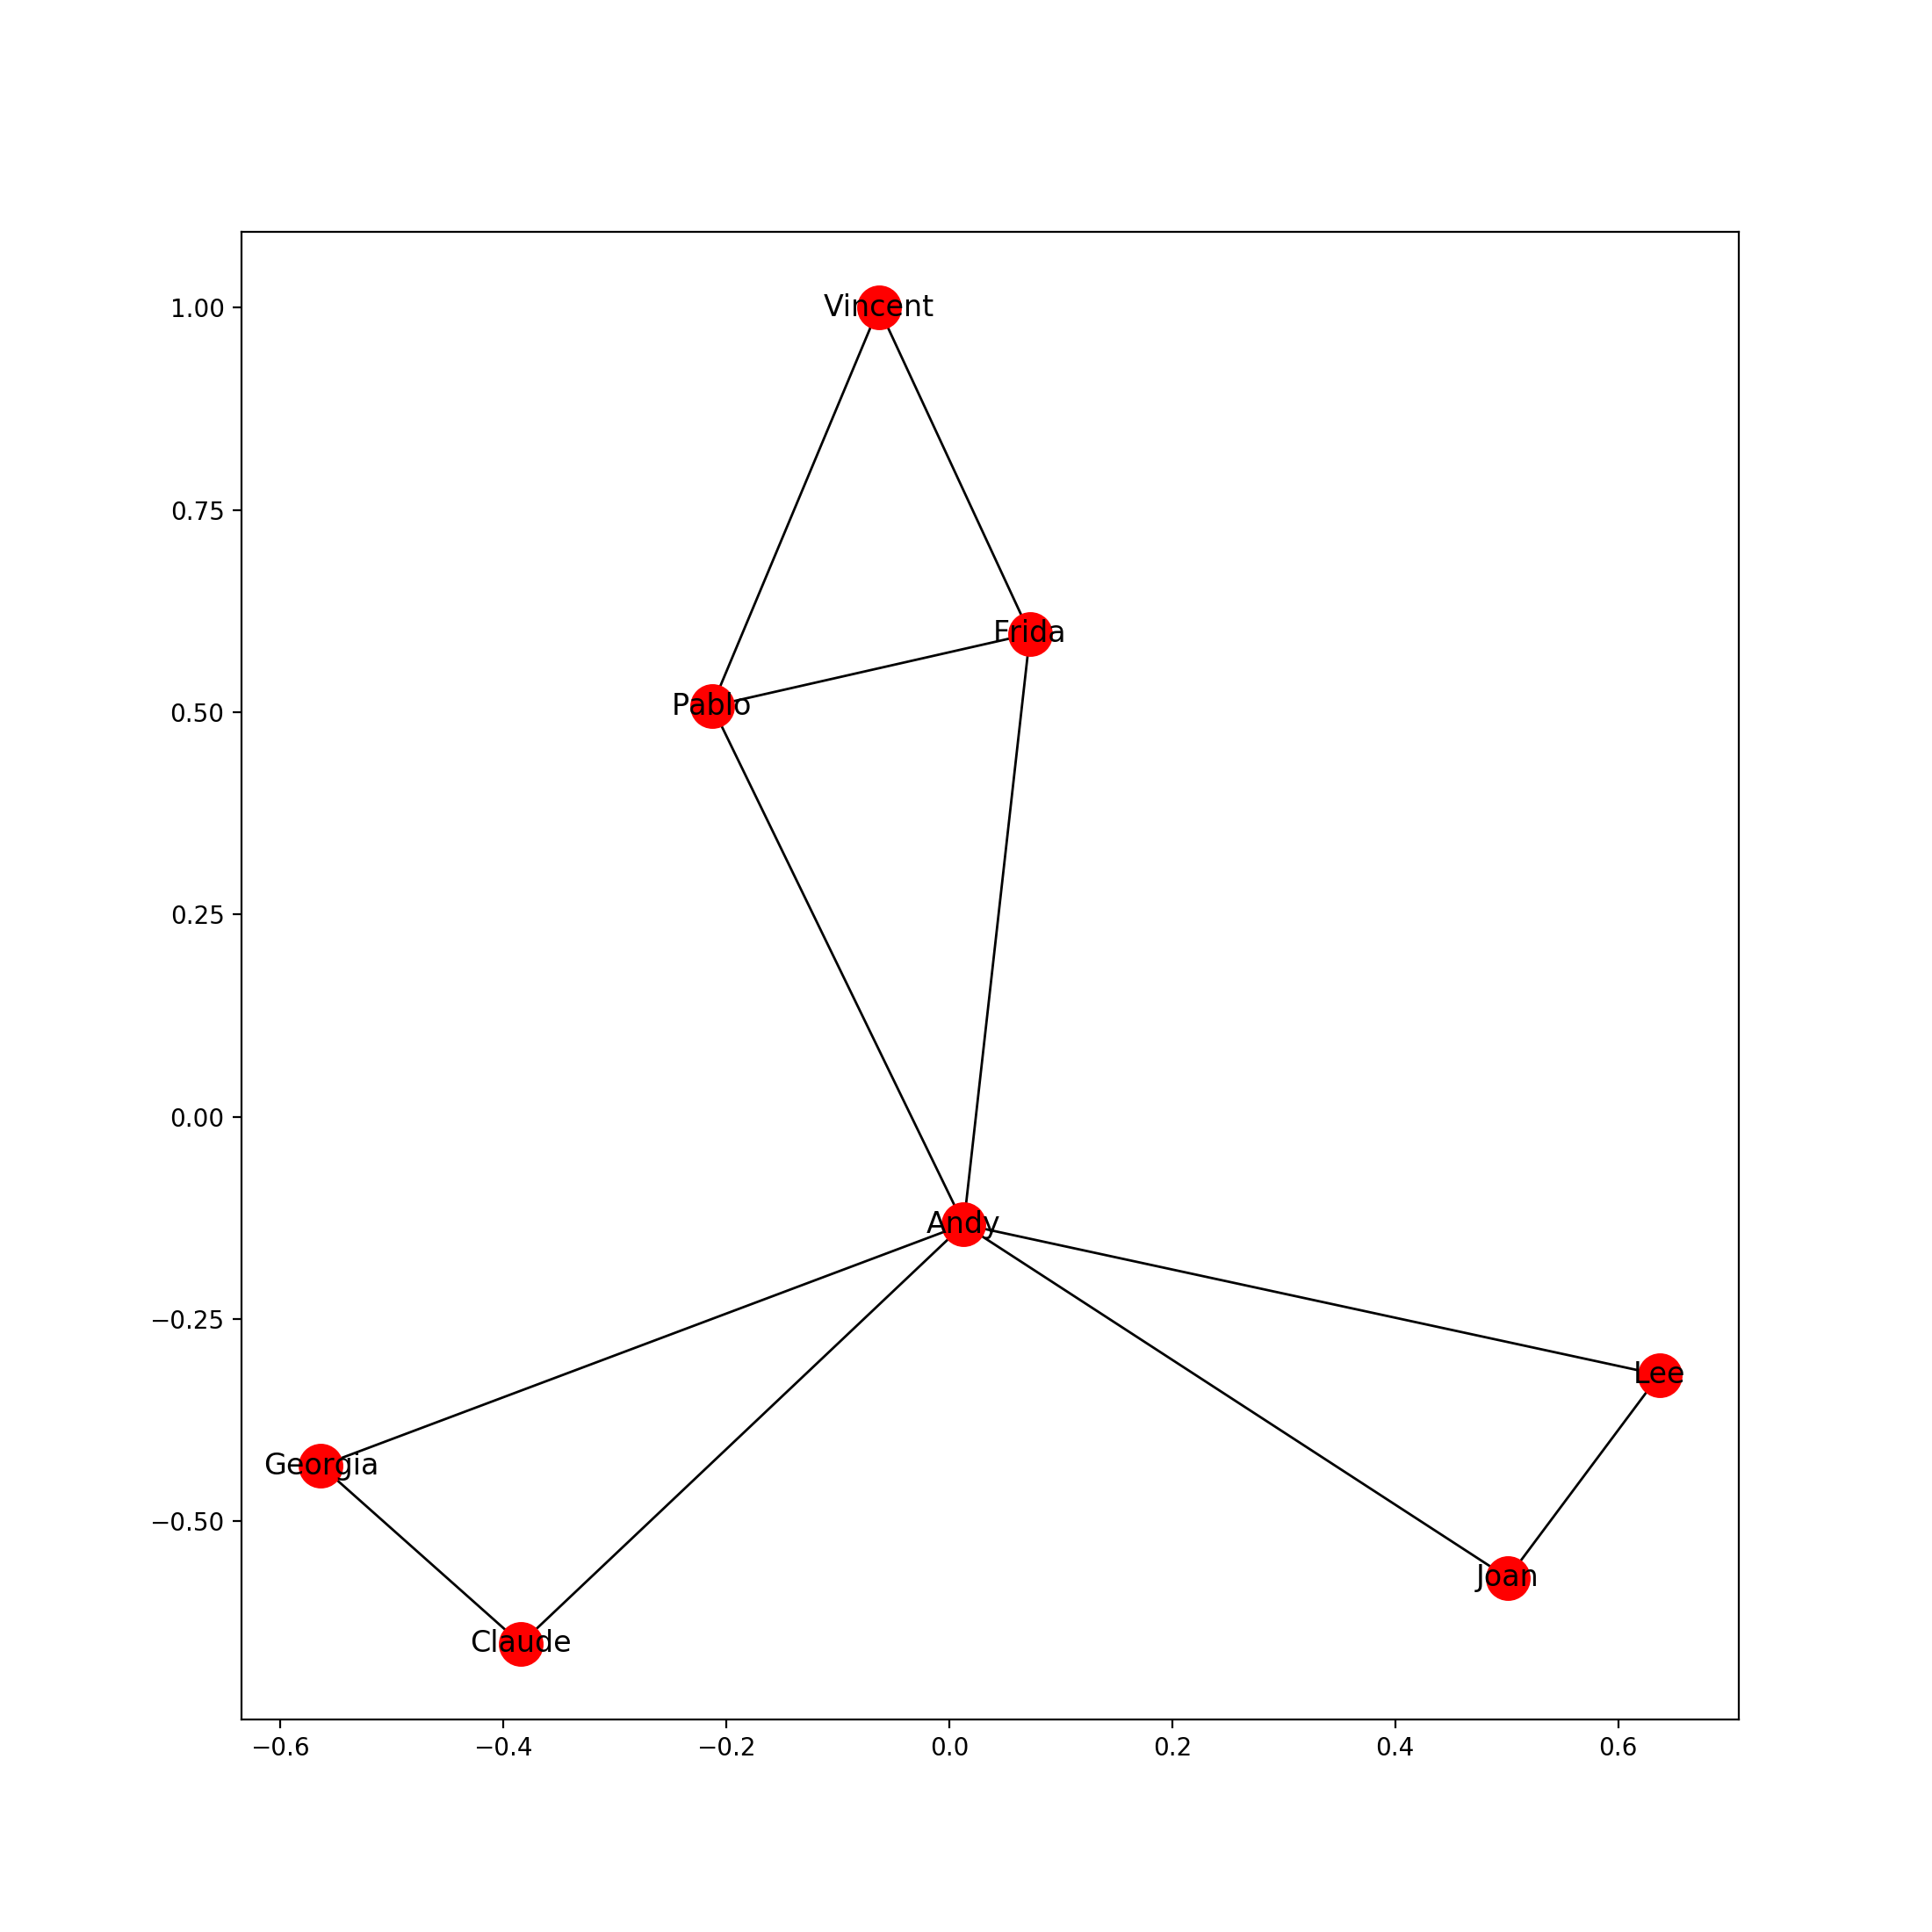

In [10]:
plot_graph(answer_three())

### Question 4

Find out if people that have a high relationship score also like the same types of movies, by calculating the Pearson correlation between employee relationship scores and the number of movies they have in common. 

In [8]:
def answer_four():
    df = pd.read_csv('Employee_Relationships.txt', delimiter = '\t', names = ['employee name 1', 'employee name 2', 'employee relationship scores'])
    G = answer_three()
    movie_relations = sorted([(v,k) for (k, v) in G.edges]+[(k,v) for (k, v) in G.edges])
    df['movie_relationship score'] = df.apply(lambda x: G.edges[x['employee name 1'], x['employee name 2']]['weight'] if (x['employee name 1'], x['employee name 2']) in movie_relations else 0, axis = 1)
    return df['employee relationship scores'].corr(df['movie_relationship score'])
answer_four()

0.7883962221733475